In [255]:
import numpy as np
import numpy.random as rand
import matplotlib.pyplot as plt
import matplotlib.patches as patches

[[ 0.02371971 -0.27641701]
 [ 0.2294861  -0.1825934 ]
 [ 0.37033082  0.15071723]
 [ 0.17880955  0.11926912]
 [-0.01612755 -0.01381186]
 [-0.41042751 -0.46339581]]


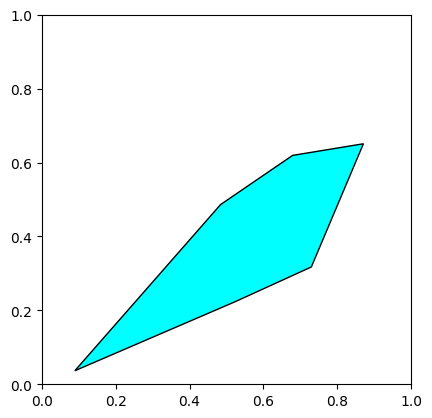

In [256]:
def generate_convex_polygon(n=4):
    if n < 3:
        return None
    
    # Generate and sort random X and Y coordinates
    x, y = np.sort(rand.uniform(low=0, high=1, size=(2,n)), axis=1) 
    
    # Isolate the extreme points
    xext, yext = (x[0], x[-1]), (y[0], y[-1]) 
    
    # Randomly divide interior points into two chains
    xint, yint = x[1:-1], y[1:-1]
    rand.shuffle(xint)
    rand.shuffle(yint)
    xint1, xint2 = np.sort(xint[:int((n-1)/2)]), np.sort(xint[int((n-1)/2):]) 
    yint1, yint2 = np.sort(yint[:int((n-1)/2)]), np.sort(yint[int((n-1)/2):])
    xchain1 = np.insert(np.append(xint1, xext[1]), 0, xext[0])
    xchain2 = np.insert(np.append(xint2, xext[1]), 0, xext[0])
    ychain1 = np.insert(np.append(yint1, yext[1]), 0, yext[0])
    ychain2 = np.insert(np.append(yint2, yext[1]), 0, yext[0])
    
    # Extract vector components
    sign = rand.choice([-1,1], 2)
    xcomps = np.concatenate((sign[0]*np.diff(xchain1), -sign[0]*np.diff(xchain2)))
    ycomps = np.concatenate((sign[1]*np.diff(ychain1), -sign[1]*np.diff(ychain2)))
    
    # Randomly combine the x- and Y-components into vectors
    rand.shuffle(xcomps)
    rand.shuffle(ycomps)
    vecs = np.array([ycomps, xcomps])
    angles = np.where(np.arctan2(*vecs) < 0, np.arctan2(*vecs) + 2*np.pi, np.arctan2(*vecs))

    # Lay vectors end to end to create polygon vertices
    coords = np.cumsum(vecs[:,np.argsort(angles)], axis=1)[[1,0]]
    coords = coords.T - np.min(coords, axis=1) + np.array([xext[0], yext[0]])
    
    return coords

points = generate_convex_polygon(n=6)
print(points - np.array([0.5, 0.5]))

fig, ax = plt.subplots()
polygon = patches.Polygon(points, closed=True, edgecolor='black', facecolor='cyan')
ax.add_patch(polygon)
ax.set_aspect('equal', 'box')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()